In [1]:
import numpy as np
import pandas as pd
#from fuzzywuzzy import fuzz

In [2]:
import seaborn as sns

In [3]:
# DATA IS FROM https://www.kaggle.com/austinreese/craigslist-carstrucks-data version 8. 
vehicles = pd.read_csv('../Raw Data/vehicles_v8.csv',parse_dates=True)

<AxesSubplot:>

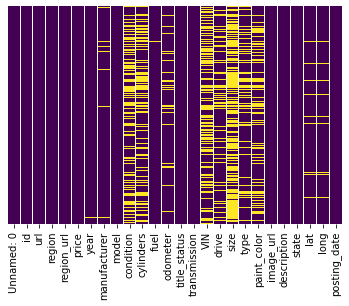

In [4]:
# CHECK FOR MISSING DATA:
sns.heatmap(vehicles.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
pd.set_option('display.max_columns', None)
vehicles.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [7]:
# ROMOVE IRELEVANT COLUMNS AND COLUMNS MISSING LOTS OF DATA
vehicles_trimmed = vehicles.drop(['id','url','region_url','condition',
                          'cylinders','VIN','drive','size','type',
                          'paint_color','image_url','description'],
                         axis=1)


In [8]:
# DROP THE REMAINING ROWS WITH MISSING VALUES
vehicles_trimmed.dropna(subset=[col for col in vehicles_trimmed if col != 'odometer'], inplace=True)

In [9]:
# CONCATENATE A year_make_model COLUMN TO RELATE TO THE epa_vehicles spreadsheet
vehicles_trimmed['year_make_model'] = vehicles['year'].astype('Int32').map(str)+' '+vehicles['manufacturer'].map(str)+' '+vehicles['model'].map(str)+ " "+vehicles['transmission']
# CONVERT THE year_make_model COLUMN TO A STRING TYPE
vehicles_trimmed['year_make_model'] = vehicles_trimmed['year_make_model'].astype('string')
vehicles_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422808 entries, 0 to 458211
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       422808 non-null  int64  
 1   region           422808 non-null  object 
 2   price            422808 non-null  int64  
 3   year             422808 non-null  float64
 4   manufacturer     422808 non-null  object 
 5   model            422808 non-null  object 
 6   fuel             422808 non-null  object 
 7   odometer         374906 non-null  float64
 8   title_status     422808 non-null  object 
 9   transmission     422808 non-null  object 
 10  state            422808 non-null  object 
 11  lat              422808 non-null  float64
 12  long             422808 non-null  float64
 13  posting_date     422808 non-null  object 
 14  year_make_model  422808 non-null  string 
dtypes: float64(4), int64(2), object(8), string(1)
memory usage: 51.6+ MB


<AxesSubplot:>

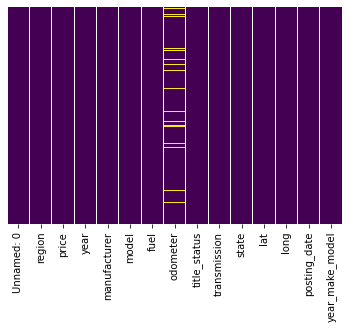

In [10]:
# CHECKING FOR MISSING VALUES AFTER TRIMMING DATA
sns.heatmap(vehicles_trimmed.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# DATA FROM https://www.fueleconomy.gov/feg/ws/index.shtml
# THIS DATA WILL BE USED TO FILL IN MISSING CYLINDERS, DRIVE, SIZE, AND TYPE VALUES
epa_vehicles = pd.read_csv('../Raw Data/EPA_Cars_1984-2022.csv')
epa_vehicles_org_cols = set(epa_vehicles.columns)

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:>

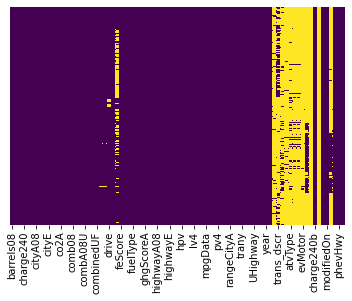

In [12]:
# CHECK FOR MISSING DATA:
sns.heatmap(epa_vehicles.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
epa_vehicles['trany'] = epa_vehicles['trany'].astype('string')
epa_vehicles['trany'] = epa_vehicles['trany'].str.split(' ').str[0]
epa_vehicles.head(5)
#epa_vehicles.info()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,year_make_model
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1950,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1985 alfa romeo spider veloce 2000
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3700,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-11000,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1985 ferrari testarossa
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1500,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1985 dodge charger
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3700,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic,12.2222,0.0,16.6667,0.0,Vans,1985,-11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1985 dodge b150/b250 wagon 2wd
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2650,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1993 subaru legacy awd turbo


In [23]:
# CONCATENATE YEAR, MAKE, AND MODEL FOR LOOKUP WITH VEHICLES TABLE
epa_vehicles['year_make_model'] = epa_vehicles['year'].map(str) +" "+ epa_vehicles['make'].map(str) +" "+ epa_vehicles['model'].map(str) +" "+ epa_vehicles['trany'].map(str)
# CHANGE THE year_make_model COLUMN FROM OBJECT TYPE TO A STRING TYPE
epa_vehicles['year_make_model'] = epa_vehicles['year_make_model'].astype('string')
# CHANGE TO LOWER CASE TO MATCH THE vehicles DF
epa_vehicles['year_make_model'] = epa_vehicles['year_make_model'].str.lower()

<AxesSubplot:>

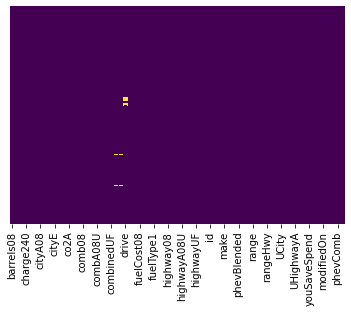

In [24]:
# DROP COLUMNS WITH MOSTLY MISSING DATA
epa_vehicles_trimmed = epa_vehicles.dropna(axis = 1, thresh = 40000)
# CREATE A SET OF THE COLUMN NAMES TO SEE WHICH COLUMNS WERE REMOVED
epa_vehicles_trimmed_cols = set(epa_vehicles_trimmed.columns)
# CHECK FOR MISSING DATA:
sns.heatmap(epa_vehicles_trimmed.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
# COLUMNS REMOVED:
epa_vehicles_org_cols - epa_vehicles_trimmed_cols

{'atvType',
 'c240Dscr',
 'c240bDscr',
 'eng_dscr',
 'evMotor',
 'fuelType2',
 'guzzler',
 'mfrCode',
 'rangeA',
 'sCharger',
 'startStop',
 'tCharger',
 'trans_dscr'}

In [26]:
# REMAINING COLUMNS
epa_vehicles_trimmed['year_make_model'].count()

43359

In [27]:
# CHECK FOR duplicate DATA in year_make_model:
#sns.heatmap(epa_vehicles_trimmed.isnull(),yticklabels=False,cbar=False,cmap='viridis')
epa_vehicles_trimmed['year_make_model'].nunique()

28045

In [31]:
pd.set_option('display.max_rows', None)
epa_vehicles_trimmed.head(100)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb,year_make_model
0,15.695714,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,-1,1950,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,1985 alfa romeo spider veloce 2000 manual
1,29.964545,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,-1,3700,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-11000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,1985 ferrari testarossa manual
2,12.207778,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,-1,1500,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,1985 dodge charger manual
3,29.964545,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,3700,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic,12.2222,0.0,16.6667,0.0,Vans,1985,-11000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,1985 dodge b150/b250 wagon 2wd automatic
4,17.347895,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,-1,2650,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,1993 subaru legacy awd turbo manual
5,14.982273,0.0,0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,4.0,1.8,Front-Wheel Drive,66020,-1,1850,0,Regular,Regular Gasoline,-1,-1,24,0.0,0,0.0,0.0,0.0,0.0,0,0,10001,0,15,Subaru,Loyale,N,False,0,88,0,0.0,0.0,0.0,0.0,Automatic,27.0000,0.0,33.0000,0.0,Compact Cars,1993,-1750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,1993 subaru loyale automatic
6,13.184400,0.0,0,0.0,22,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,355.480000,25,0.0,0,0.0,0.0,0.0,0.0,4.0,1.8,Front-Wheel Drive,66020,-1,1650,0,Regular,Regular Gasoline,-1,-1,29,0.0,0,0.0,0.0,0.0,0.0,0,0,10002,0,15,Subaru,Loyale,Y,False,0,88,0,0.0,0.0,0.0,0.0,Manual,28.0000,0.0,41.0000,0.0,Compact Cars,1993,-750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,1993 subaru loyale manual
7,13.733750,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,370.291667,24,0.0,0,0.0,0.0,0.0,0.0,4.0,1.6,Front-Wheel Drive,57005,-1,1700,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,0.0,0.0,0.0,0,0,10003,0,13,Toyota,Corolla,Y,False,0,89,0,0.0,0.0,0.0,0.0,Automatic,29.0000,0.0,37.0000,0.0,Compact Cars,1993,-1000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,1993 toyota corolla automatic
8,12.677308,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,341.807692,26,0.0,0,0.0,0.0,0.0,0.0,4.0,1.6,Front-Wheel